In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

### **Problem Statement**

Leveraging Data Analytics to Identify Credit Faults and Enhance Decision-Making in Microfinance Institutions

Microfinance institutions(MFIs) play a crucial role in providing financial services to underserved communities. However, these institutions often face challenges in managing credit risk, detecting potential faults, and understanding borrower behavior. With the increasing availability of digital records and transaction data, there is an opportunity to leverage advanced data science techniques to improve operational efficiency and decision-making.

We aim to demonstrate the critical role of data preparation in building reliable predictive models. By properly transforming and cleaning the data, we enable the model to classify clients accurately while effectively handling challenges such as high feature complexity, substantial missing values, and a relatively large dataset.

---
## **Data Collection**

The dataset includes microfinance institution transactions, borrower profiles, and repayment histories.
The provided dataset includes client-related features and loan details. The target variable is binary: 1: indicates the client faced payment difficulties, defined as late payments exceeding a specific threshold on at least one of the first installments 0: indicates no significant payment issues.

Challenges Handling large datasets with numerous features and potential multicollinearity is a significant challenge. Efficient feature selection and model optimization will be essential for achieving high predictive accuracy.

Files train.csv: The training dataset containing client features and the target variable. test.csv: The testing dataset with client features for prediction.

---
## **Solution Path**

To highlight the critical role of data preparation in machine learning, our project adopts a dual-pipeline strategy designed to show how different models benefit from tailored preprocessing. We formulate the problem as a **binary classification task** (default vs. non-default), and we develop two separate modeling approaches—one linear and one tree-based—to demonstrate how preprocessing decisions influence model performance, assumptions, and robustness.

---
## **Assumptions of Linear-Based Model (Logistic Regression)**

* Observations are independent.
* Target variable is binary.
* There is a linear relationship between predictors and the log-odds of the outcome.
* No extreme outliers are present.
* Requires a sufficiently large sample size for stable coefficient estimates.

---
## **Assumptions of Tree-Based Models (Random Forest / XGBoost)**

* Observations are independent and identically distributed (IID).
* No assumptions about linearity or data distribution (non-parametric).
* Relevant features can create meaningful splits.
* Splits aim to reduce impurity using metrics such as Gini, entropy, or information gain.
* Features—categorical or continuous—can be partitioned effectively.
* Model performance depends on the ability to recursively partition the feature space into homogeneous regions.

---



In [7]:
df = pd.read_csv('raw_data/full_data.csv')
print(f'Shape: {df.shape[0]} rows, {df.shape[1]} columns')

Shape: 215258 rows, 122 columns


In [8]:
df = df.copy()

In [9]:
columns_to_drop = ['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
            'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
            'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
            'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
            'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
            'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE',
            'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
            'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
            'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
            'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI',
            'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
            'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
            'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
            'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'
        ]
df = df.drop(columns=columns_to_drop)

In [10]:
df.shape

(215258, 75)

In [11]:
df.to_csv('raw_data/train.csv', index=False)

In [10]:
print(df.nunique().sort_values(ascending=True).tolist())

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 5, 5, 6, 6, 7, 7, 7, 8, 9, 9, 9, 9, 10, 15, 16, 18, 22, 24, 24, 25, 25, 26, 30, 32, 33, 46, 46, 47, 49, 58, 59, 80, 146, 147, 150, 157, 197, 207, 227, 241, 266, 266, 275, 353, 364, 715, 743, 804, 841, 1063, 1114, 1763, 1998, 2214, 2905, 2959, 2978, 3055, 3081, 3090, 3348, 3377, 3377, 3626, 3630, 3686, 3719, 4924, 4981, 5066, 5073, 5107, 6114, 11751, 12778, 15253, 17372, 84084, 102402, 215258]


In [ ]:
print(df.nunique()==3)

ID                            False
TARGET                        False
NAME_CONTRACT_TYPE            False
CODE_GENDER                    True
FLAG_OWN_CAR                  False
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     False
AMT_REQ_CREDIT_BUREAU_WEEK    False
AMT_REQ_CREDIT_BUREAU_MON     False
AMT_REQ_CREDIT_BUREAU_QRT     False
AMT_REQ_CREDIT_BUREAU_YEAR    False
Length: 122, dtype: bool


In [16]:
for i in df.columns:
    print(f"'{i}' ,")

'ID' ,
'TARGET' ,
'NAME_CONTRACT_TYPE' ,
'CODE_GENDER' ,
'FLAG_OWN_CAR' ,
'FLAG_OWN_REALTY' ,
'CNT_CHILDREN' ,
'AMT_INCOME_TOTAL' ,
'AMT_CREDIT' ,
'AMT_ANNUITY' ,
'AMT_GOODS_PRICE' ,
'NAME_TYPE_SUITE' ,
'NAME_INCOME_TYPE' ,
'NAME_EDUCATION_TYPE' ,
'NAME_FAMILY_STATUS' ,
'NAME_HOUSING_TYPE' ,
'REGION_POPULATION_RELATIVE' ,
'DAYS_BIRTH' ,
'DAYS_EMPLOYED' ,
'DAYS_REGISTRATION' ,
'DAYS_ID_PUBLISH' ,
'OWN_CAR_AGE' ,
'FLAG_MOBIL' ,
'FLAG_EMP_PHONE' ,
'FLAG_WORK_PHONE' ,
'FLAG_CONT_MOBILE' ,
'FLAG_PHONE' ,
'FLAG_EMAIL' ,
'OCCUPATION_TYPE' ,
'CNT_FAM_MEMBERS' ,
'REGION_RATING_CLIENT' ,
'REGION_RATING_CLIENT_W_CITY' ,
'WEEKDAY_APPR_PROCESS_START' ,
'HOUR_APPR_PROCESS_START' ,
'REG_REGION_NOT_LIVE_REGION' ,
'REG_REGION_NOT_WORK_REGION' ,
'LIVE_REGION_NOT_WORK_REGION' ,
'REG_CITY_NOT_LIVE_CITY' ,
'REG_CITY_NOT_WORK_CITY' ,
'LIVE_CITY_NOT_WORK_CITY' ,
'ORGANIZATION_TYPE' ,
'EXT_SOURCE_1' ,
'EXT_SOURCE_2' ,
'EXT_SOURCE_3' ,
'APARTMENTS_AVG' ,
'BASEMENTAREA_AVG' ,
'YEARS_BEGINEXPLUATATION_AVG' ,
'YE

In [37]:
df['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Working                 111204
Commercial associate     50132
Pensioner                38780
State servant            15101
Unemployed                  18
Student                     14
Businessman                  7
Maternity leave              2
Name: count, dtype: int64

In [38]:
df['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 38656
Sales staff              22337
Core staff               19349
Managers                 14899
Drivers                  12997
High skill tech staff     7900
Accountants               6914
Medicine staff            6002
Security staff            4738
Cooking staff             4184
Cleaning staff            3215
Private service staff     1838
Low-skill Laborers        1476
Waiters/barmen staff       917
Secretaries                914
Realty agents              505
HR staff                   392
IT staff                   361
Name: count, dtype: int64

In [39]:
df['DAYS_EMPLOYED'].value_counts()

DAYS_EMPLOYED
 365243    38790
-230         114
-199         108
-212         107
-116         102
           ...  
-13949         1
-13200         1
-11434         1
-14452         1
-12646         1
Name: count, Length: 11751, dtype: int64

In [40]:
df[df['DAYS_EMPLOYED'].isna()][[ 'NAME_INCOME_TYPE']].value_counts()

Series([], Name: count, dtype: int64)

In [41]:
df[df['DAYS_EMPLOYED'] == 365243][['DAYS_EMPLOYED', 'NAME_INCOME_TYPE']].value_counts()

DAYS_EMPLOYED  NAME_INCOME_TYPE
365243         Pensioner           38772
               Unemployed             18
Name: count, dtype: int64

In [42]:
df['OWN_CAR_AGE'].isna().sum()

np.int64(142104)

In [43]:
df['OWN_CAR_AGE'].value_counts()

OWN_CAR_AGE
7.0     5272
6.0     4468
3.0     4438
2.0     4136
8.0     4101
4.0     3854
1.0     3664
9.0     3538
10.0    3393
13.0    3209
14.0    3145
12.0    2944
11.0    2867
15.0    2495
5.0     2487
16.0    2370
17.0    2018
64.0    1696
18.0    1674
0.0     1509
19.0    1326
20.0    1093
21.0    1032
22.0     878
24.0     816
23.0     739
65.0     653
25.0     595
26.0     394
28.0     379
27.0     335
29.0     274
30.0     236
31.0     188
32.0     148
34.0     124
35.0     111
33.0      96
36.0      93
38.0      65
40.0      60
39.0      57
37.0      56
41.0      42
42.0      28
43.0      15
44.0      14
54.0       9
45.0       4
46.0       3
49.0       3
63.0       2
55.0       2
50.0       1
56.0       1
51.0       1
69.0       1
48.0       1
57.0       1
Name: count, dtype: int64

In [44]:
df[['OCCUPATION_TYPE', 'NAME_INCOME_TYPE']]

,OCCUPATION_TYPE,NAME_INCOME_TYPE
0,NaN,Working
1,Laborers,Commercial associate
2,Sales staff,Commercial associate
3,Realty agents,Working
4,Accountants,Commercial associate
...,...,...
215253,Cooking staff,Working
215254,Sales staff,Working
215255,Managers,Working
215256,Drivers,Working


In [ ]:
# List of prefixes to search for in column names
prefixes = [
    'APARTMENTS_',
    'BASEMENTAREA_',
    'YEARS_BEGINEXPLUATATION_',
    'YEARS_BUILD_',
    'COMMONAREA_',
    'ELEVATORS_',
    'ENTRANCES_',
    'FLOORSMAX_',
    'FLOORSMIN_',
    'LANDAREA_',
    'LIVINGAPARTMENTS_',
    'LIVINGAREA_',
    'NONLIVINGAPARTMENTS_',
    'NONLIVINGAREA_',
    
]

# Find columns in df that start with any of the prefixes
matched_columns = [col for col in df.columns if any(col.startswith(p) for p in prefixes)]
print(f'Found {len(matched_columns)} matching columns:' )
#print(matched_columns)
df_house = df[matched_columns + ['TARGET']]
matched_columns

Found 42 matching columns:


['APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI']

In [ ]:
columns_to_drop = ['APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI']
df_prep = df.drop(columns=columns_to_drop, errors = 'ignore')

In [46]:
# understand dataset structure
# shape
print(f'Shape: {df_house.shape[0]} rows, {df_house.shape[1]} columns')

Shape: 215258 rows, 43 columns


In [47]:
#data types
for col in df_house.columns:
    print(f"{col:30} : {str(df_house[col].dtype):15}")
# all the columns are of numeric type

APARTMENTS_AVG                 : float64        
BASEMENTAREA_AVG               : float64        
YEARS_BEGINEXPLUATATION_AVG    : float64        
YEARS_BUILD_AVG                : float64        
COMMONAREA_AVG                 : float64        
ELEVATORS_AVG                  : float64        
ENTRANCES_AVG                  : float64        
FLOORSMAX_AVG                  : float64        
FLOORSMIN_AVG                  : float64        
LANDAREA_AVG                   : float64        
LIVINGAPARTMENTS_AVG           : float64        
LIVINGAREA_AVG                 : float64        
NONLIVINGAPARTMENTS_AVG        : float64        
NONLIVINGAREA_AVG              : float64        
APARTMENTS_MODE                : float64        
BASEMENTAREA_MODE              : float64        
YEARS_BEGINEXPLUATATION_MODE   : float64        
YEARS_BUILD_MODE               : float64        
COMMONAREA_MODE                : float64        
ELEVATORS_MODE                 : float64        
ENTRANCES_MODE      

In [48]:
# Show min, max and range for each column in df_house
print('Column ranges for df_house (min, max, range):')
ranges = df_house.agg(['min', 'max', 'std']).T
from IPython.display import display
display(ranges.reset_index().rename(columns={'index': 'column'}))

Column ranges for df_house (min, max, range):


,column,min,max,std
0,APARTMENTS_AVG,0.0,1.0,0.107966
1,BASEMENTAREA_AVG,0.0,1.0,0.082441
2,YEARS_BEGINEXPLUATATION_AVG,0.0,1.0,0.059629
3,YEARS_BUILD_AVG,0.0,1.0,0.113160
4,COMMONAREA_AVG,0.0,1.0,0.076603
5,ELEVATORS_AVG,0.0,1.0,0.133824
6,ENTRANCES_AVG,0.0,1.0,0.099724
7,FLOORSMAX_AVG,0.0,1.0,0.144370
8,FLOORSMIN_AVG,0.0,1.0,0.161352
9,LANDAREA_AVG,0.0,1.0,0.081075


=> The df is already normalization

The dataset has already **scaled** the original housing features into **0–1 numeric ratios**.
They no longer represent raw quantities (like square meters or number of floors).
Instead, they represent **relative proportions** of each client’s property characteristics **compared to the total population**.

## **Understand the meaning of features**

These features are **scaled between 0 and 1**, representing the borrower’s housing and building characteristics **relative to all other properties in the dataset**:

### **Housing & Apartment Indicators**

* **APARTMENTS_AVG / MODE / MEDI** – Normalized number of apartments in the borrower’s building.
* **LIVINGAREA_*** – Normalized living area within the apartment.
* **LIVINGAPARTMENTS_*** – Normalized count of residential units.
* **NONLIVINGAREA_*** – Normalized non-residential area (storage/cellars).
* **NONLIVINGAPARTMENTS_*** – Normalized count of non-living units.

---

### **Building Structure & Age**

* **YEARS_BEGINEXPLUATATION_*** – How recently the building began operation (normalized).
* **YEARS_BUILD_*** – Construction year (normalized).
* **FLOORSMAX_*** – Highest floor of the building (normalized).
* **FLOORSMIN_*** – Lowest floor (normalized).
* **LANDAREA_*** – Land area of the building (normalized).
* **COMMONAREA_*** – Size of shared areas (normalized).

---

### **Infrastructure & Access**

* **ELEVATORS_*** – Normalized number of elevators.
* **ENTRANCES_*** – Normalized number of building entrances.

---

### **About the Suffixes**

* **AVG** – Mean-imputed value
* **MODE** – Mode-imputed value
* **MEDI** – Median-imputed value




In [49]:
import pandas as pd

# Calculate missing count
missing_count = df_house.isnull().sum()
m = df_house.shape[0]
print(m)
# Calculate missing percentage
missing_percent = (df_house.isnull().mean() * 100).round(2)

# Combine into a well-formatted DataFrame
missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_percent
})

# Filter to show only columns with missing data (optional)
missing_df = missing_df[missing_df['Missing Count'] > 0]

# Sort by highest missing %
missing_df = missing_df.sort_values(by='Missing %', ascending=False)

missing_df.style.background_gradient(cmap='OrRd')


215258


,Missing Count,Missing %
COMMONAREA_AVG,150500,69.920000
COMMONAREA_MODE,150500,69.920000
COMMONAREA_MEDI,150500,69.920000
NONLIVINGAPARTMENTS_MODE,149455,69.430000
NONLIVINGAPARTMENTS_AVG,149455,69.430000
NONLIVINGAPARTMENTS_MEDI,149455,69.430000
LIVINGAPARTMENTS_AVG,147175,68.370000
LIVINGAPARTMENTS_MODE,147175,68.370000
LIVINGAPARTMENTS_MEDI,147175,68.370000
FLOORSMIN_AVG,146077,67.860000


In [50]:
def outlier_summary(df):
    """
    Detect outliers for all numeric columns using the IQR method.
    Returns a clean DataFrame with:
    - Outlier Count
    - Outlier %
    """
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    results = []

    for col in numeric_cols:
        series = df[col].dropna()

        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outliers = series[(series < lower) | (series > upper)]
        outlier_count = outliers.shape[0]
        outlier_percent = round((outlier_count / len(series) * 100), 2)

        results.append({
            "Column": col,
            "Outlier Count": outlier_count,
            "Outlier %": outlier_percent
        })

    outlier_df = pd.DataFrame(results)
    outlier_df = outlier_df.sort_values(by="Outlier %", ascending=False)

    return outlier_df


# Run the summary
outlier_df = outlier_summary(df_house)

outlier_df = outlier_df.sort_values(by="Outlier %", ascending=False)
outlier_df.style.background_gradient(cmap='Reds')


,Column,Outlier Count,Outlier %
12,NONLIVINGAPARTMENTS_AVG,10869,16.520000
40,NONLIVINGAPARTMENTS_MEDI,10629,16.150000
26,NONLIVINGAPARTMENTS_MODE,9921,15.080000
27,NONLIVINGAREA_MODE,13173,13.660000
41,NONLIVINGAREA_MEDI,12046,12.490000
13,NONLIVINGAREA_AVG,11567,11.990000
32,COMMONAREA_MEDI,5612,8.670000
18,COMMONAREA_MODE,5614,8.670000
4,COMMONAREA_AVG,5589,8.630000
25,LIVINGAREA_MODE,9144,8.530000


In [51]:
# Check rows where one feature-group exists but another does not (pairwise)
# Uses the same prefixes used earlier to group related columns
import os
prefixes = [
    'APARTMENTS_',
    'BASEMENTAREA_',
    'YEARS_BEGINEXPLUATATION_',
    'YEARS_BUILD_',
    'COMMONAREA_',
    'ELEVATORS_',
    'ENTRANCES_',
    'FLOORSMAX_',
    'FLOORSMIN_',
    'LANDAREA_',
    'LIVINGAPARTMENTS_',
    'LIVINGAREA_',
    'NONLIVINGAPARTMENTS_',
    'NONLIVINGAREA_',
]

import itertools
wd = os.getcwd()
pairs_report = []
examples_dir = os.path.join(wd, 'pairwise_presence_examples')
os.makedirs(examples_dir, exist_ok=True)

# For each ordered pair (A,B), compute rows where A present and B missing, and vice versa
for a, b in itertools.permutations(prefixes, 2):
    cols_a = [c for c in df_house.columns if c.startswith(a)]
    cols_b = [c for c in df_house.columns if c.startswith(b)]
    if len(cols_a) == 0 or len(cols_b) == 0:
        continue
    # rows where any A col has a value
    has_a = df_house[cols_a].notna().any(axis=1)
    has_b = df_house[cols_b].notna().any(axis=1)
    a_not_b = (has_a & ~has_b)
    b_not_a = (has_b & ~has_a)
    cnt_a_not_b = int(a_not_b.sum())
    cnt_b_not_a = int(b_not_a.sum())
    if cnt_a_not_b > 0 or cnt_b_not_a > 0:
        pairs_report.append({
            'A': a, 'B': b,
            'cols_A': ';'.join(cols_a),
            'cols_B': ';'.join(cols_b),
            'A_not_B_count': cnt_a_not_b,
            'B_not_A_count': cnt_b_not_a
        })
        # save small examples (first 10 rows) for A_not_B and B_not_A if present
        if cnt_a_not_b > 0:
            ex_a = df_house.loc[a_not_b, cols_a + cols_b + ['TARGET']].head(10)
            ex_a.to_csv(os.path.join(examples_dir, f'ex_{a.strip(
)}_has_not_{b.strip(
)}.csv'), index=False)
        if cnt_b_not_a > 0:
            ex_b = df_house.loc[b_not_a, cols_a + cols_b + ['TARGET']].head(10)
            ex_b.to_csv(os.path.join(examples_dir, f'ex_{b.strip(
)}_has_not_{a.strip(
)}.csv'), index=False)

# Summarize and save report
pairs_df = pd.DataFrame(pairs_report)
pairs_csv = os.path.join(wd, 'df_house_pairwise_presence.csv')
if not pairs_df.empty:
    pairs_df = pairs_df[['A','B','A_not_B_count','B_not_A_count','cols_A','cols_B']]
    pairs_df.to_csv(pairs_csv, index=False)
    print('Saved pairwise presence report to:', pairs_csv)
    print('Example CSVs (up to 10 rows each) saved in:', examples_dir)
    display(pairs_df.sort_values(['A_not_B_count','B_not_A_count'], ascending=False).head(30))
else:
    print('No pairwise presence mismatches found for the given prefixes')

Saved pairwise presence report to: d:\data_final\Data-Visualization\df_house_pairwise_presence.csv
Example CSVs (up to 10 rows each) saved in: d:\data_final\Data-Visualization\pairwise_presence_examples


,A,B,A_not_B_count,B_not_A_count,cols_A,cols_B
29,YEARS_BEGINEXPLUATATION_,COMMONAREA_,45533,60,YEARS_BEGINEXPLUATATION_AVG;YEARS_BEGINEXPLUAT...,COMMONAREA_AVG;COMMONAREA_MODE;COMMONAREA_MEDI
37,YEARS_BEGINEXPLUATATION_,NONLIVINGAPARTMENTS_,44518,90,YEARS_BEGINEXPLUATATION_AVG;YEARS_BEGINEXPLUAT...,NONLIVINGAPARTMENTS_AVG;NONLIVINGAPARTMENTS_MO...
95,FLOORSMAX_,COMMONAREA_,43398,51,FLOORSMAX_AVG;FLOORSMAX_MODE;FLOORSMAX_MEDI,COMMONAREA_AVG;COMMONAREA_MODE;COMMONAREA_MEDI
147,LIVINGAREA_,COMMONAREA_,42467,59,LIVINGAREA_AVG;LIVINGAREA_MODE;LIVINGAREA_MEDI,COMMONAREA_AVG;COMMONAREA_MODE;COMMONAREA_MEDI
102,FLOORSMAX_,NONLIVINGAPARTMENTS_,42351,49,FLOORSMAX_AVG;FLOORSMAX_MODE;FLOORSMAX_MEDI,NONLIVINGAPARTMENTS_AVG;NONLIVINGAPARTMENTS_MO...
35,YEARS_BEGINEXPLUATATION_,LIVINGAPARTMENTS_,42273,125,YEARS_BEGINEXPLUATATION_AVG;YEARS_BEGINEXPLUAT...,LIVINGAPARTMENTS_AVG;LIVINGAPARTMENTS_MODE;LIV...
82,ENTRANCES_,COMMONAREA_,42111,47,ENTRANCES_AVG;ENTRANCES_MODE;ENTRANCES_MEDI,COMMONAREA_AVG;COMMONAREA_MODE;COMMONAREA_MEDI
154,LIVINGAREA_,NONLIVINGAPARTMENTS_,41542,179,LIVINGAREA_AVG;LIVINGAREA_MODE;LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_AVG;NONLIVINGAPARTMENTS_MO...
3,APARTMENTS_,COMMONAREA_,41502,331,APARTMENTS_AVG;APARTMENTS_MODE;APARTMENTS_MEDI,COMMONAREA_AVG;COMMONAREA_MODE;COMMONAREA_MEDI
33,YEARS_BEGINEXPLUATATION_,FLOORSMIN_,41247,197,YEARS_BEGINEXPLUATATION_AVG;YEARS_BEGINEXPLUAT...,FLOORSMIN_AVG;FLOORSMIN_MODE;FLOORSMIN_MEDI


In [52]:
df_pair = pd.read_csv('df_house_pairwise_presence.csv')
df_pair.head(10)

,A,B,A_not_B_count,B_not_A_count,cols_A,cols_B
0,APARTMENTS_,BASEMENTAREA_,17668,925,APARTMENTS_AVG;APARTMENTS_MODE;APARTMENTS_MEDI,BASEMENTAREA_AVG;BASEMENTAREA_MODE;BASEMENTARE...
1,APARTMENTS_,YEARS_BEGINEXPLUATATION_,559,4861,APARTMENTS_AVG;APARTMENTS_MODE;APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_AVG;YEARS_BEGINEXPLUAT...
2,APARTMENTS_,YEARS_BUILD_,34557,738,APARTMENTS_AVG;APARTMENTS_MODE;APARTMENTS_MEDI,YEARS_BUILD_AVG;YEARS_BUILD_MODE;YEARS_BUILD_MEDI
3,APARTMENTS_,COMMONAREA_,41502,331,APARTMENTS_AVG;APARTMENTS_MODE;APARTMENTS_MEDI,COMMONAREA_AVG;COMMONAREA_MODE;COMMONAREA_MEDI
4,APARTMENTS_,ELEVATORS_,6864,1416,APARTMENTS_AVG;APARTMENTS_MODE;APARTMENTS_MEDI,ELEVATORS_AVG;ELEVATORS_MODE;ELEVATORS_MEDI
5,APARTMENTS_,ENTRANCES_,1695,2588,APARTMENTS_AVG;APARTMENTS_MODE;APARTMENTS_MEDI,ENTRANCES_AVG;ENTRANCES_MODE;ENTRANCES_MEDI
6,APARTMENTS_,FLOORSMAX_,606,2782,APARTMENTS_AVG;APARTMENTS_MODE;APARTMENTS_MEDI,FLOORSMAX_AVG;FLOORSMAX_MODE;FLOORSMAX_MEDI
7,APARTMENTS_,FLOORSMIN_,37302,554,APARTMENTS_AVG;APARTMENTS_MODE;APARTMENTS_MEDI,FLOORSMIN_AVG;FLOORSMIN_MODE;FLOORSMIN_MEDI
8,APARTMENTS_,LANDAREA_,19422,862,APARTMENTS_AVG;APARTMENTS_MODE;APARTMENTS_MEDI,LANDAREA_AVG;LANDAREA_MODE;LANDAREA_MEDI
9,APARTMENTS_,LIVINGAPARTMENTS_,38226,380,APARTMENTS_AVG;APARTMENTS_MODE;APARTMENTS_MEDI,LIVINGAPARTMENTS_AVG;LIVINGAPARTMENTS_MODE;LIV...


Quỷ missing phức tạp vậy =))))

Correlation matrix (df_house) - showing head and shape


,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TARGET
APARTMENTS_AVG,1.000000,0.679696,0.100050,0.343158,0.538615,0.835861,0.609582,0.620881,0.447112,0.496003,0.944172,0.912526,0.193934,0.296247,0.972879,0.661293,0.094728,0.341319,0.531410,0.821962,0.581373,0.616586,0.439826,0.486965,0.930536,0.892631,0.189505,0.282634,0.994544,0.679656,0.099406,0.342050,0.540080,0.834212,0.605885,0.618606,0.445273,0.497769,0.941902,0.911599,0.192877,0.293800,-0.031691
BASEMENTAREA_AVG,0.679696,1.000000,0.082941,0.250411,0.401025,0.565222,0.647826,0.331809,0.222146,0.471436,0.646662,0.694257,0.089288,0.264849,0.666929,0.972545,0.054957,0.251057,0.397882,0.555476,0.623401,0.330871,0.219582,0.465415,0.647009,0.678767,0.088558,0.258253,0.679016,0.992956,0.072613,0.249666,0.402986,0.562914,0.643747,0.329843,0.220597,0.473322,0.649123,0.691210,0.089153,0.263300,-0.024244
YEARS_BEGINEXPLUATATION_AVG,0.100050,0.082941,1.000000,0.463125,0.081560,0.079269,0.041417,0.129359,0.160402,0.072829,0.136479,0.091850,0.031141,0.000865,0.101005,0.077587,0.970397,0.457678,0.076454,0.080464,0.037067,0.129063,0.156444,0.069010,0.131400,0.088012,0.027915,0.000771,0.100142,0.082166,0.992556,0.462538,0.081825,0.079420,0.040713,0.129129,0.160032,0.072841,0.136670,0.091383,0.030359,-0.000377,-0.012328
YEARS_BUILD_AVG,0.343158,0.250411,0.463125,1.000000,0.232207,0.345399,0.091326,0.519080,0.357905,0.181787,0.335036,0.357795,0.065343,0.125001,0.324901,0.234509,0.276852,0.989191,0.223749,0.335956,0.075577,0.512301,0.350888,0.171124,0.326906,0.340243,0.059412,0.108791,0.341603,0.247976,0.405087,0.998371,0.233125,0.345460,0.089233,0.518181,0.357464,0.182449,0.335747,0.357050,0.063863,0.121924,-0.025322
COMMONAREA_AVG,0.538615,0.401025,0.081560,0.232207,1.000000,0.523115,0.321029,0.407236,0.297604,0.251766,0.532931,0.546491,0.107224,0.230958,0.515337,0.383851,0.040387,0.228862,0.977293,0.506025,0.296859,0.401271,0.291258,0.239452,0.527307,0.523304,0.105866,0.221453,0.538396,0.400041,0.062802,0.231675,0.994976,0.521630,0.318739,0.405398,0.297002,0.252803,0.534705,0.545256,0.106850,0.230189,-0.016896


Shape: (43, 43)
Saved correlation matrix to: d:\data_final\Data-Visualization\df_house_corr_matrix.csv


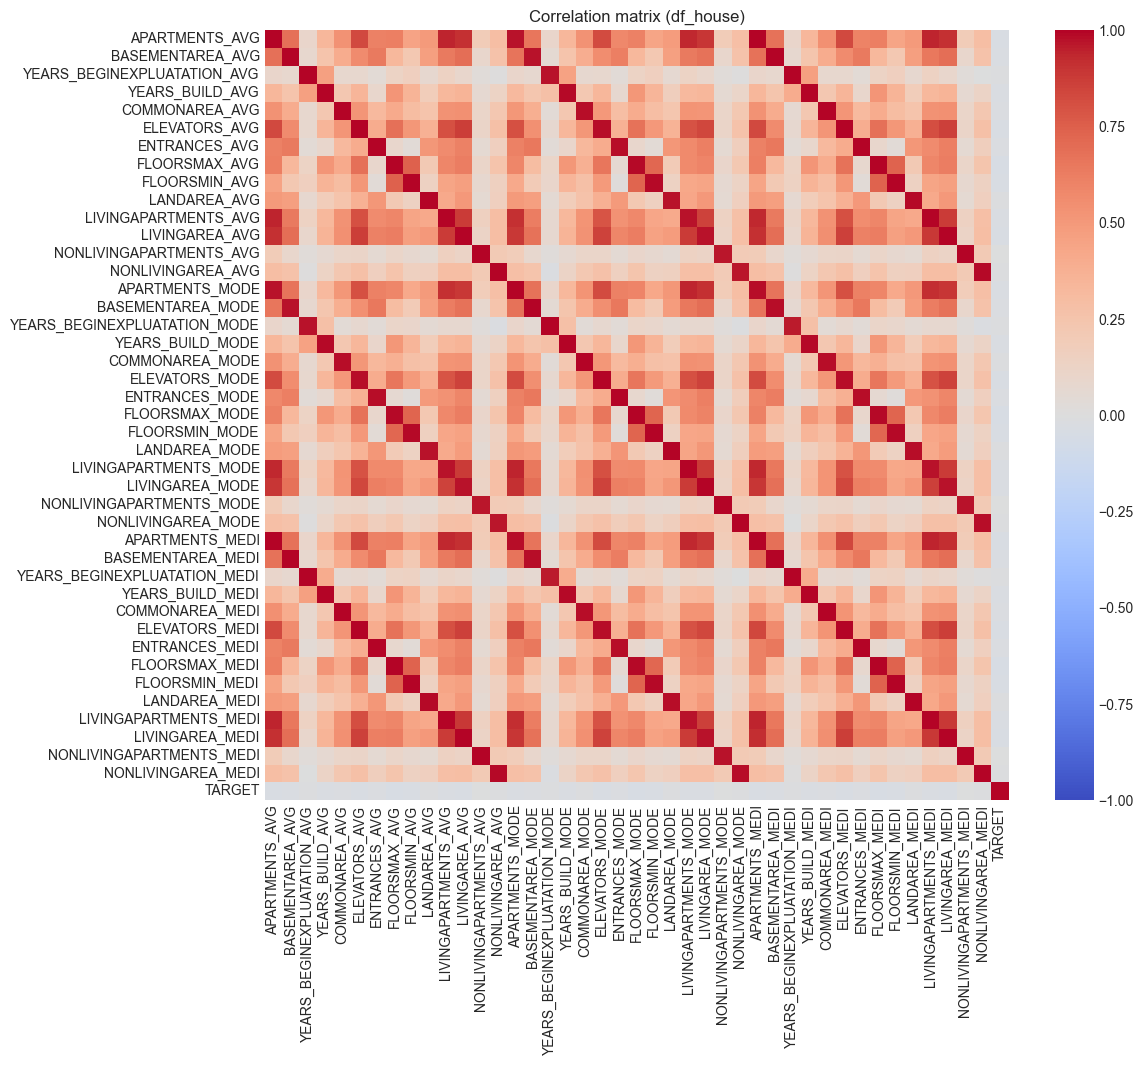

,correlation
FLOORSMAX_AVG,-0.046865
FLOORSMAX_MEDI,-0.046828
FLOORSMAX_MODE,-0.045743
FLOORSMIN_AVG,-0.038523
FLOORSMIN_MEDI,-0.038411
ELEVATORS_AVG,-0.037052
FLOORSMIN_MODE,-0.036984
ELEVATORS_MEDI,-0.036770
ELEVATORS_MODE,-0.034635
LIVINGAREA_AVG,-0.034223


Saved TARGET correlations to: d:\data_final\Data-Visualization\df_house_target_correlations_sorted.csv


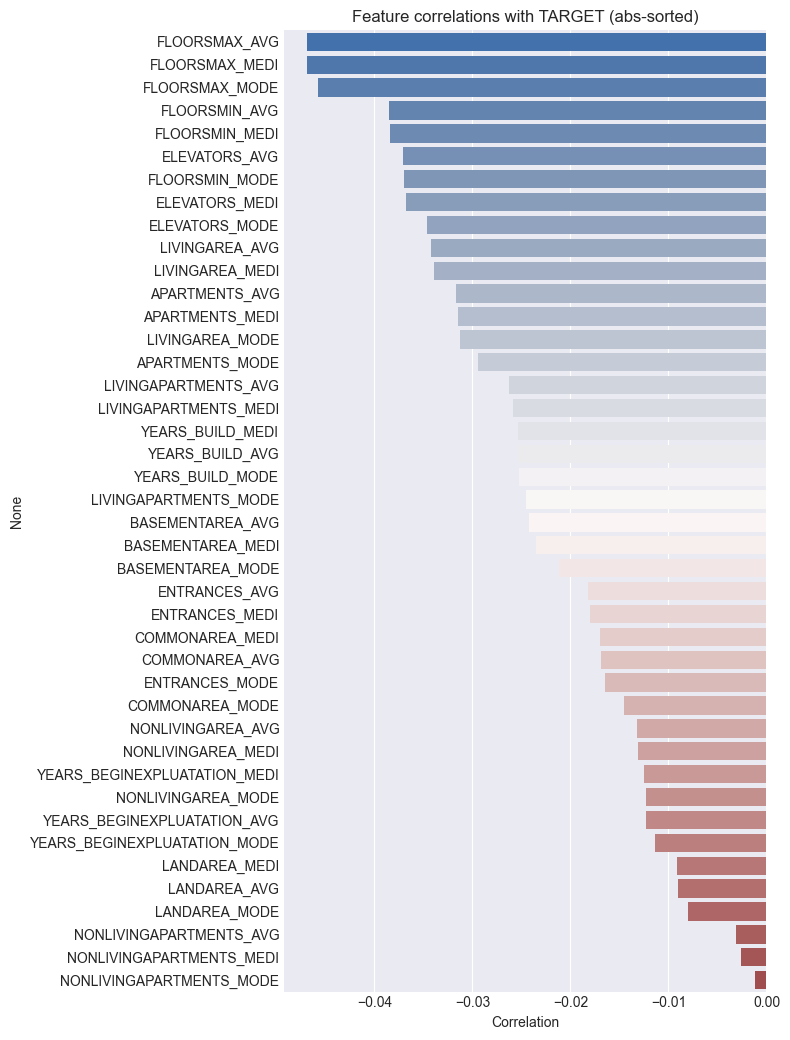

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
# Correlation matrix and features vs TARGET visualization
import os
from IPython.display import display
# compute correlation matrix for df_house
corr = df_house.corr()
# display full correlation matrix (may be wide)
print('Correlation matrix (df_house) - showing head and shape')
display(corr.head())
print('Shape:', corr.shape)
# save full matrix to CSV
corr_csv = os.path.join(os.getcwd(), 'df_house_corr_matrix.csv')
corr.to_csv(corr_csv)
print('Saved correlation matrix to:', corr_csv)

# Heatmap of correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation matrix (df_house)')
plt.show()

# Correlations with TARGET, sorted by absolute value
if 'TARGET' in corr.columns:
    target_corr = corr['TARGET'].drop('TARGET').sort_values(key=lambda s: s.abs(), ascending=False)
    display(target_corr.to_frame('correlation'))
    target_corr_csv = os.path.join(os.getcwd(), 'df_house_target_correlations_sorted.csv')
    target_corr.to_csv(target_corr_csv, header=['correlation'])
    print('Saved TARGET correlations to:', target_corr_csv)
    # horizontal barplot for easy reading
    plt.figure(figsize=(8, max(6, 0.25 * len(target_corr))))
    sns.barplot(x=target_corr.values, y=target_corr.index, palette='vlag')
    plt.title('Feature correlations with TARGET (abs-sorted)')
    plt.xlabel('Correlation')
    plt.tight_layout()
    plt.show()
else:
    print('TARGET column not found in correlation matrix')


In [54]:
df_house = df_house.dropna()

## **Random Forest**

In [55]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from imblearn.over_sampling import SMOTENC

df = df.copy()
df = df.dropna()
print(f'shape: {df.shape[0]}')
# Features and target variable
X = df.drop('TARGET', axis=1)  # Features
y = df['TARGET']  # Target variable

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].astype('category')

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Apply SMOTE to balance the training data
cat_features = [i for i, col in enumerate(X_train.columns) if X_train[col].dtype.name == 'category']
smote = SMOTENC(categorical_features=cat_features, random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_train_smote.value_counts())

model = xgb.XGBClassifier(
    enable_categorical=True,
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    objective='binary:logistic',
    eval_metric='auc',
    tree_method='hist',
    random_state=42
)

# Train
model.fit(X_train_smote, y_train_smote)

# ---------------------------
# 3. Predictions
# ---------------------------
# Train predictions
y_train_pred = model.predict(X_train)
y_train_proba = model.predict_proba(X_train)[:, 1]

# Test predictions
y_test_pred = model.predict(X_test)
# Convert to pandas Series to use value_counts()
y_test_pred_series = pd.Series(y_test_pred)

print("\n🔢 Prediction Counts:")
print(y_test_pred_series.value_counts())
y_test_proba = model.predict_proba(X_test)[:, 1]

# ---------------------------
# 4. Evaluation
# ---------------------------
train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

train_auc = roc_auc_score(y_train, y_train_proba)
test_auc  = roc_auc_score(y_test, y_test_proba)

print("📌 XGBoost Results")
print("----------------------------")
print(f"Train Accuracy : {train_acc:.4f}")
print(f"Test Accuracy  : {test_acc:.4f}")
print(f"Train ROC-AUC  : {train_auc:.4f}")
print(f"Test ROC-AUC   : {test_auc:.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

shape: 5961
Class distribution after SMOTE:
TARGET
0    4481
1    4481
Name: count, dtype: int64

🔢 Prediction Counts:
0    1181
1      12
Name: count, dtype: int64
📌 XGBoost Results
----------------------------
Train Accuracy : 0.9830
Test Accuracy  : 0.9413
Train ROC-AUC  : 0.9989
Test ROC-AUC   : 0.6519

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1131
           1       0.17      0.03      0.05        62

    accuracy                           0.94      1193
   macro avg       0.56      0.51      0.51      1193
weighted avg       0.91      0.94      0.92      1193



## **XGBoost**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import pandas as pd

# ---------------------------
# 1. Prepare data
# ---------------------------
df= pd.read_csv('train.csv')
df = df.copy()

X = df.drop(columns=['TARGET'])
y = df['TARGET']
# Convert all object columns to category
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].astype('category')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------
# 2. XGBoost Model
# ---------------------------
model = xgb.XGBClassifier(
    enable_categorical=True,
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    objective='binary:logistic',
    eval_metric='auc',
    tree_method='hist',
    random_state=42
)

# Train
model.fit(X_train, y_train)

# ---------------------------
# 3. Predictions
# ---------------------------
# Train predictions
y_train_pred = model.predict(X_train)
y_train_proba = model.predict_proba(X_train)[:, 1]

# Test predictions
y_test_pred = model.predict(X_test)
# Convert to pandas Series to use value_counts()
y_test_pred_series = pd.Series(y_test_pred)

print("\n🔢 Prediction Counts:")
print(y_test_pred_series.value_counts())
y_test_proba = model.predict_proba(X_test)[:, 1]

# ---------------------------
# 4. Evaluation
# ---------------------------
train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

train_auc = roc_auc_score(y_train, y_train_proba)
test_auc  = roc_auc_score(y_test, y_test_proba)

print("📌 XGBoost Results")
print("----------------------------")
print(f"Train Accuracy : {train_acc:.4f}")
print(f"Test Accuracy  : {test_acc:.4f}")
print(f"Train ROC-AUC  : {train_auc:.4f}")
print(f"Test ROC-AUC   : {test_auc:.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))



🔢 Prediction Counts:
0    42930
1      122
Name: count, dtype: int64
📌 XGBoost Results
----------------------------
Train Accuracy : 0.9213
Test Accuracy  : 0.9194
Train ROC-AUC  : 0.8228
Test ROC-AUC   : 0.7552

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     39576
           1       0.52      0.02      0.04      3476

    accuracy                           0.92     43052
   macro avg       0.72      0.51      0.50     43052
weighted avg       0.89      0.92      0.88     43052



## **Logistic Regression**

In [57]:

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, precision_score, recall_score
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# ---------------------------
# 1. Prepare data
# ---------------------------
df = pd.read_csv('train.csv')
df = df.copy()
df = df.dropna()

X = df.drop(columns=['TARGET'])
y = df['TARGET']

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Ensure categorical dtype for object columns (optional)
for col in categorical_cols:
    X[col] = X[col].astype('category')
X = X[numeric_cols]
# Train-test split (stratify to preserve target ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
smote = SMOTE( random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# ---------------------------
# 2. Preprocessing + Logistic Regression Pipeline
# ---------------------------

clf = Pipeline(steps=[
    ('clf', LogisticRegression(max_iter=1000, solver='saga', n_jobs=-1, class_weight='balanced'))
])

# Train the model
clf.fit(X_train_smote, y_train_smote)

# ---------------------------
# 3. Predictions
# ---------------------------
y_train_pred = clf.predict(X_train)
y_train_proba = clf.predict_proba(X_train)[:, 1]

y_test_pred = clf.predict(X_test)
y_test_proba = clf.predict_proba(X_test)[:, 1]

# ---------------------------
# 4. Evaluation
# ---------------------------
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_auc = roc_auc_score(y_train, y_train_proba)
test_auc = roc_auc_score(y_test, y_test_proba)


print("\n==============================")
print("📌 MODEL EVALUATION RESULTS")
print("==============================")

# ----- Train Metrics -----
print("\n🔹 TRAIN PERFORMANCE")
print(f"Accuracy      : {train_acc:.4f}")
print(f"ROC-AUC       : {train_auc:.4f}")

print("\n  • Class 0 Metrics")
print(f"Precision (0) : {precision_score(y_train, y_train_pred, pos_label=0):.4f}")
print(f"Recall (0)    : {recall_score(y_train, y_train_pred, pos_label=0):.4f}")
print(f"F1 Score (0)  : {f1_score(y_train, y_train_pred, pos_label=0):.4f}")

print("\n  • Class 1 Metrics")
print(f"Precision (1) : {precision_score(y_train, y_train_pred, pos_label=1):.4f}")
print(f"Recall (1)    : {recall_score(y_train, y_train_pred, pos_label=1):.4f}")
print(f"F1 Score (1)  : {f1_score(y_train, y_train_pred, pos_label=1):.4f}")

# ----- Test Metrics -----
print("\n🔹 TEST PERFORMANCE")
print(f"Accuracy      : {test_acc:.4f}")
print(f"ROC-AUC       : {test_auc:.4f}")

print("\n  • Class 0 Metrics")
print(f"Precision (0) : {precision_score(y_test, y_test_pred, pos_label=0):.4f}")
print(f"Recall (0)    : {recall_score(y_test, y_test_pred, pos_label=0):.4f}")
print(f"F1 Score (0)  : {f1_score(y_test, y_test_pred, pos_label=0):.4f}")

print("\n  • Class 1 Metrics")
print(f"Precision (1) : {precision_score(y_test, y_test_pred, pos_label=1):.4f}")
print(f"Recall (1)    : {recall_score(y_test, y_test_pred, pos_label=1):.4f}")
print(f"F1 Score (1)  : {f1_score(y_test, y_test_pred, pos_label=1):.4f}")

# ----- Confusion Matrix -----
print("\n🔹 CONFUSION MATRIX (Test Set)")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

# ----- Classification Report -----
print("\n🔹 CLASSIFICATION REPORT (Test Set)")
print(classification_report(y_test, y_test_pred))


📌 MODEL EVALUATION RESULTS

🔹 TRAIN PERFORMANCE
Accuracy      : 0.6013
ROC-AUC       : 0.6110

  • Class 0 Metrics
Precision (0) : 0.9556
Recall (0)    : 0.6046
F1 Score (0)  : 0.7406

  • Class 1 Metrics
Precision (1) : 0.0794
Recall (1)    : 0.5484
F1 Score (1)  : 0.1386

🔹 TEST PERFORMANCE
Accuracy      : 0.5767
ROC-AUC       : 0.6115

  • Class 0 Metrics
Precision (0) : 0.9478
Recall (0)    : 0.5824
F1 Score (0)  : 0.7215

  • Class 1 Metrics
Precision (1) : 0.0676
Recall (1)    : 0.4857
F1 Score (1)  : 0.1187

🔹 CONFUSION MATRIX (Test Set)
[[654 469]
 [ 36  34]]

🔹 CLASSIFICATION REPORT (Test Set)
              precision    recall  f1-score   support

           0       0.95      0.58      0.72      1123
           1       0.07      0.49      0.12        70

    accuracy                           0.58      1193
   macro avg       0.51      0.53      0.42      1193
weighted avg       0.90      0.58      0.69      1193



In [58]:

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, precision_score, recall_score
import pandas as pd
import numpy as np

# ---------------------------
# 1. Prepare data
# ---------------------------
df = pd.read_csv('train.csv')
df = df.copy()
df = df.dropna()

X = df.drop(columns=['TARGET'])
y = df['TARGET']

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Ensure categorical dtype for object columns (optional)
for col in categorical_cols:
    X[col] = X[col].astype('category')

# Train-test split (stratify to preserve target ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
smote = SMOTENC(categorical_features=categorical_cols, random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# ---------------------------
# 2. Preprocessing + Logistic Regression Pipeline
# ---------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ],
)

clf = Pipeline(steps=[
    ('preproc', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, solver='saga', n_jobs=-1, class_weight='balanced'))
])

# Train the model
clf.fit(X_train_smote, y_train_smote)

# ---------------------------
# 3. Predictions
# ---------------------------
y_train_pred = clf.predict(X_train)
y_train_proba = clf.predict_proba(X_train)[:, 1]

y_test_pred = clf.predict(X_test)
y_test_proba = clf.predict_proba(X_test)[:, 1]

# ---------------------------
# 4. Evaluation
# ---------------------------
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_auc = roc_auc_score(y_train, y_train_proba)
test_auc = roc_auc_score(y_test, y_test_proba)


print("\n==============================")
print("📌 MODEL EVALUATION RESULTS")
print("==============================")

# ----- Train Metrics -----
print("\n🔹 TRAIN PERFORMANCE")
print(f"Accuracy      : {train_acc:.4f}")
print(f"ROC-AUC       : {train_auc:.4f}")

print("\n  • Class 0 Metrics")
print(f"Precision (0) : {precision_score(y_train, y_train_pred, pos_label=0):.4f}")
print(f"Recall (0)    : {recall_score(y_train, y_train_pred, pos_label=0):.4f}")
print(f"F1 Score (0)  : {f1_score(y_train, y_train_pred, pos_label=0):.4f}")

print("\n  • Class 1 Metrics")
print(f"Precision (1) : {precision_score(y_train, y_train_pred, pos_label=1):.4f}")
print(f"Recall (1)    : {recall_score(y_train, y_train_pred, pos_label=1):.4f}")
print(f"F1 Score (1)  : {f1_score(y_train, y_train_pred, pos_label=1):.4f}")

# ----- Test Metrics -----
print("\n🔹 TEST PERFORMANCE")
print(f"Accuracy      : {test_acc:.4f}")
print(f"ROC-AUC       : {test_auc:.4f}")

print("\n  • Class 0 Metrics")
print(f"Precision (0) : {precision_score(y_test, y_test_pred, pos_label=0):.4f}")
print(f"Recall (0)    : {recall_score(y_test, y_test_pred, pos_label=0):.4f}")
print(f"F1 Score (0)  : {f1_score(y_test, y_test_pred, pos_label=0):.4f}")

print("\n  • Class 1 Metrics")
print(f"Precision (1) : {precision_score(y_test, y_test_pred, pos_label=1):.4f}")
print(f"Recall (1)    : {recall_score(y_test, y_test_pred, pos_label=1):.4f}")
print(f"F1 Score (1)  : {f1_score(y_test, y_test_pred, pos_label=1):.4f}")

# ----- Confusion Matrix -----
print("\n🔹 CONFUSION MATRIX (Test Set)")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

# ----- Classification Report -----
print("\n🔹 CLASSIFICATION REPORT (Test Set)")
print(classification_report(y_test, y_test_pred))


📌 MODEL EVALUATION RESULTS

🔹 TRAIN PERFORMANCE
Accuracy      : 0.8612
ROC-AUC       : 0.6902

  • Class 0 Metrics
Precision (0) : 0.9516
Recall (0)    : 0.8982
F1 Score (0)  : 0.9241

  • Class 1 Metrics
Precision (1) : 0.1394
Recall (1)    : 0.2652
F1 Score (1)  : 0.1827

🔹 TEST PERFORMANCE
Accuracy      : 0.8466
ROC-AUC       : 0.6273

  • Class 0 Metrics
Precision (0) : 0.9493
Recall (0)    : 0.8842
F1 Score (0)  : 0.9156

  • Class 1 Metrics
Precision (1) : 0.1156
Recall (1)    : 0.2429
F1 Score (1)  : 0.1567

🔹 CONFUSION MATRIX (Test Set)
[[993 130]
 [ 53  17]]

🔹 CLASSIFICATION REPORT (Test Set)
              precision    recall  f1-score   support

           0       0.95      0.88      0.92      1123
           1       0.12      0.24      0.16        70

    accuracy                           0.85      1193
   macro avg       0.53      0.56      0.54      1193
weighted avg       0.90      0.85      0.87      1193

